In [1]:
%load_ext autoreload
%autoreload 2
from gratin.standard import train_model, load_model, plot_demo, get_predictions
import matplotlib.pyplot as plt
import socket

In [2]:
if "jbmasson" in socket.gethostname():
    export_path = "/home/hverdier/Gaia/hecat/hippo/models/andi_17may2022"
else:
    export_path = "/Users/hverdier/models/demo_28aout"

stage is None, strange...
Create TrajDataset, seed_offset = 100000
Create TrajDataset, seed_offset = 0
Create TrajDataset, seed_offset = 200000
Create TrajDataset, seed_offset = 100000


Sanity Checking: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 200000


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 300000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 400000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 500000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 600000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 700000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 800000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 900000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 1000000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 1100000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 1200000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 1300000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 1400000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 1500000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 1600000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 1700000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 1800000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 1900000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 2000000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 2100000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 2200000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 2300000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 2400000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 2500000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 2600000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 2700000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 2800000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 2900000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 3000000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 3100000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 3200000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 3300000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 3400000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 3500000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 3600000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 3700000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 3800000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 3900000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 4000000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 4100000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 4200000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 4300000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 4400000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 4500000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 4600000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 4700000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 4800000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 4900000


Validation: 0it [00:00, ?it/s]

Create TrajDataset, seed_offset = 5000000
Create TrajDataset, seed_offset = 5000000


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        Test metric                 DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
alpha_test_MeanAbsoluteError    0.24419423937797546
      alpha_test_loss            0.2940741181373596
     model_test_F1Score          0.6974158883094788
      model_test_loss           0.43572303652763367
         test_loss               0.670665979385376
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
[{'alpha_test_loss': 0.2940741181373596, 'alpha_test_MeanAbsoluteError': 0.24419423937797546, 'model_test_loss': 0.43572303652763367, 'model_test_F1Score': 0.6974158883094788, 'test_loss': 0.670665979385376}]
Create TrajDataset, seed_offset = 5000000


2022-08-28 20:36:32.005146: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


ParametricUMAP(encoder=<keras.engine.sequential.Sequential object at 0x7f84d42fff40>, optimizer=<keras.optimizer_v2.adam.Adam object at 0x7f84d42ffd90>)
Sun Aug 28 20:36:32 2022 Construct fuzzy simplicial set
Sun Aug 28 20:36:32 2022 Finding Nearest Neighbors
Sun Aug 28 20:36:32 2022 Building RP forest with 10 trees
Sun Aug 28 20:36:32 2022 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	Stopping threshold met -- exiting after 3 iterations
Sun Aug 28 20:36:51 2022 Finished Nearest Neighbor Search
Sun Aug 28 20:36:54 2022 Construct embedding
Epoch 1/10
6348/6348 [==============================] - 41s 6ms/step - loss: 0.1649
Epoch 2/10
6348/6348 [==============================] - 41s 6ms/step - loss: 0.1511
Epoch 3/10
6348/6348 [==============================] - 42s 7ms/step - loss: 0.1494
Epoch 4/10
6348/6348 [==============================] - 42s 7ms/step - loss: 0.1487
Epoch 5/10
6348/6348 [==============================] - 41s 6ms/step - loss: 0.1482
Epoch 6/10
6348/63

2022-08-28 20:44:50.495619: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /Users/hverdier/models/demo_28aout/umap/assets


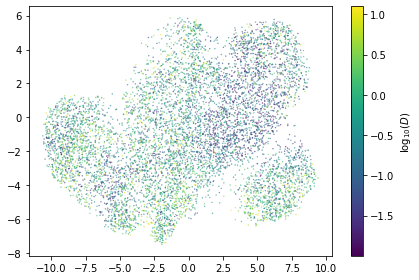

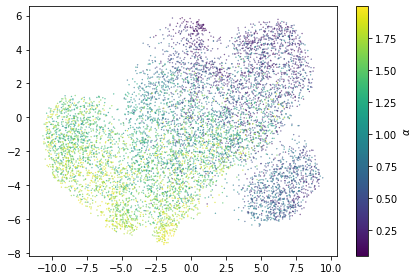

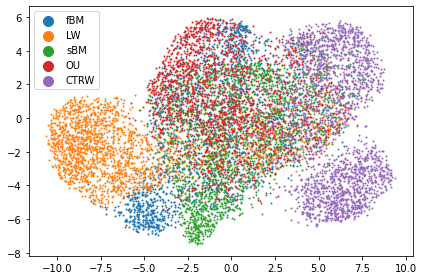

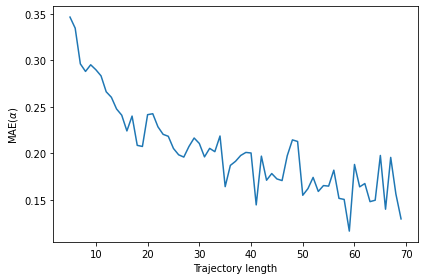

In [3]:
model, encoder = train_model(
    export_path= export_path,
    max_n_epochs=50,
    length_range=(5,70),
    num_workers=4,
    time_delta_range=(.003,1.5))

In [4]:
model, encoder = load_model(export_path)

2022-05-19 15:06:41.933151: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-05-19 15:06:41.933822: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:03:00.0 name: Quadro P6000 computeCapability: 6.1
coreClock: 1.645GHz coreCount: 30 deviceMemorySize: 23.87GiB deviceMemoryBandwidth: 403.49GiB/s
2022-05-19 15:06:41.933866: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2022-05-19 15:06:41.933924: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2022-05-19 15:06:41.933965: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2022-05-19 15:06:41.934012: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcufft.so.10
2

In [ ]:
plot_demo(model,encoder,num_workers=4,time_delta=0.03,length_range=(10,500))

In [17]:
import numpy as np

D = 0.1
dfs = {}
L = 15
for delta_t in [0.005,0.01,0.03,.1]:
    trajs = [np.cumsum(np.random.randn(L,2)*np.sqrt(2*D*delta_t),axis=0)  + np.random.normal(loc=0,scale=0.03,size=(L,2)) for _ in range(1000)]
    times = [np.arange(traj.shape[0])*delta_t for traj in trajs]
    dfs[delta_t] = get_predictions(model, encoder, trajs, times)

/Users/hverdier/opt/miniconda3/envs/gratin/lib/python3.8/site-packages/torch_geometric/deprecation.py:12: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/Users/hverdier/opt/miniconda3/envs/gratin/lib/python3.8/site-packages/torch_geometric/deprecation.py:12: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/Users/hverdier/opt/miniconda3/envs/gratin/lib/python3.8/site-packages/torch_geometric/deprecation.py:12: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/Users/hverdier/opt/miniconda3/envs/gratin/lib/python3.8/site-packages/torch_geometric/deprecation.py:12: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


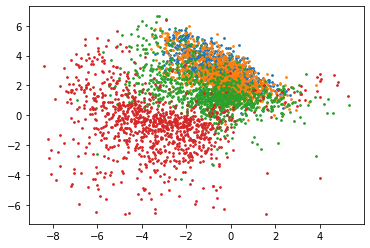

In [18]:
# Latent space is sensitive to exposition time
for delta_t in dfs:
    plt.scatter(dfs[delta_t]["U_1"],dfs[delta_t]["U_2"],s=3)

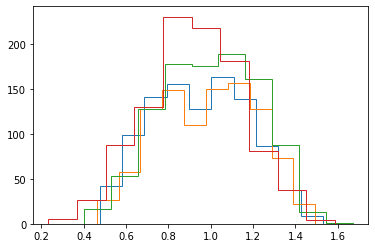

In [19]:
for delta_t in dfs:
    plt.hist(dfs[delta_t]["alpha"],histtype="step")